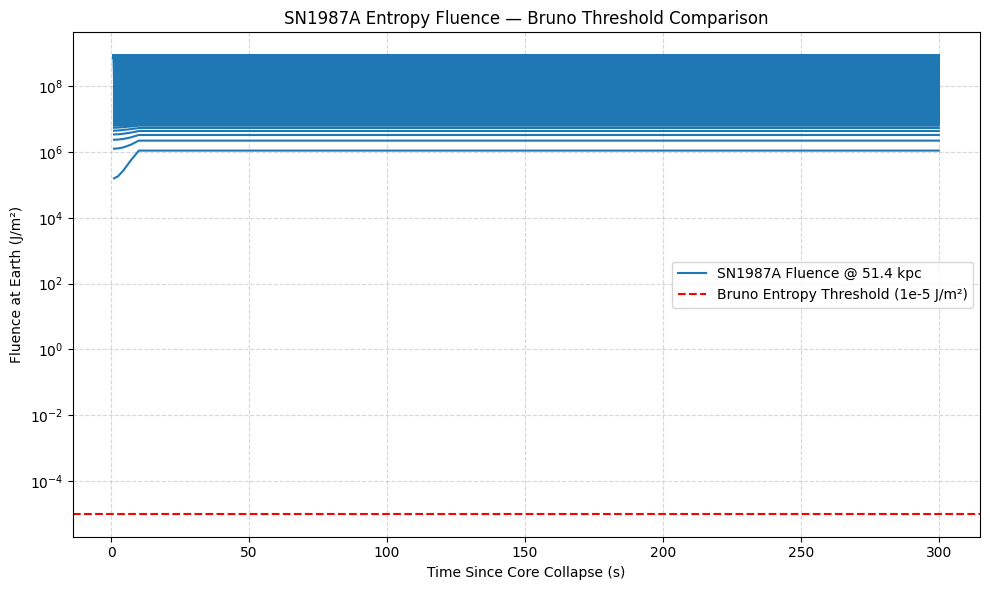

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and parse SN1987A simulation data
df_sn1987a = pd.read_csv(
    file_path,
    skiprows=1,
    sep=r"\s+",
    names=["t_start", "t_end", "E_nue", "E_nueb", "E_nux", "N_nue", "N_nueb", "N_nux"]
)


# Constants
ERG_TO_JOULE = 1e-7
DISTANCE_MPC_SN1987A = 0.0514  # 51.4 kpc
DISTANCE_M_SN1987A = DISTANCE_MPC_SN1987A * 3.086e22  # in meters

# Time bin duration
df_sn1987a["dt"] = df_sn1987a["t_end"] - df_sn1987a["t_start"]

# Total energy (Joules) per bin
df_sn1987a["E_total_erg"] = df_sn1987a["E_nue"] + df_sn1987a["E_nueb"] + df_sn1987a["E_nux"]
df_sn1987a["E_total_J"] = df_sn1987a["E_total_erg"] * ERG_TO_JOULE

# Luminosity and cumulative fluence
df_sn1987a["Luminosity_J_per_s"] = df_sn1987a["E_total_J"] / df_sn1987a["dt"]
df_sn1987a["Cumulative_Energy_J"] = df_sn1987a["E_total_J"].cumsum()
df_sn1987a["Fluence_J_per_m2"] = df_sn1987a["Cumulative_Energy_J"] / (4 * np.pi * DISTANCE_M_SN1987A**2)

# Plot fluence vs time
plt.figure(figsize=(10, 6))
plt.plot(df_sn1987a["t_end"], df_sn1987a["Fluence_J_per_m2"], label="SN1987A Fluence @ 51.4 kpc")
plt.axhline(1e-5, color="red", linestyle="--", label="Bruno Entropy Threshold (1e-5 J/m²)")
plt.xlabel("Time Since Core Collapse (s)")
plt.ylabel("Fluence at Earth (J/m²)")
plt.yscale("log")
plt.title("SN1987A Entropy Fluence — Bruno Threshold Comparison")
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# Recompute derived columns if lost in session
df_sn1987a["dt"] = df_sn1987a["t_end"] - df_sn1987a["t_start"]
df_sn1987a["E_total_erg"] = df_sn1987a["E_nue"] + df_sn1987a["E_nueb"] + df_sn1987a["E_nux"]
df_sn1987a["E_total_J"] = df_sn1987a["E_total_erg"] * 1e-7
df_sn1987a["Cumulative_Energy_J"] = df_sn1987a["E_total_J"].cumsum()
df_sn1987a["Fluence_J_per_m2"] = df_sn1987a["Cumulative_Energy_J"] / (4 * np.pi * (0.0514 * 3.086e22)**2)


In [16]:
crossing_index = np.where(df_sn1987a["Fluence_J_per_m2"] >= 1e-5)[0]
detection_time_sec = df_sn1987a["t_end"].iloc[crossing_index[0]] if len(crossing_index) > 0 else None
detection_time_sec


np.float64(1.0)